# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [25]:
# Import Splinter and BeautifulSoup - Data Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Open a Chrome window using Splinter
get_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=get_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [27]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [29]:
# Gather the html from the current page in the browser (coockie cutter from previous hws)
html = browser.html

# Create a Beautiful Soup object to parse the HTML
soup = BeautifulSoup(html, 'html.parser')

In [30]:
# Extract all rows of data
# Find the table containing weather data
table = soup.find("table", {"class": "table"})

# Print a snapshot of the table HTML (first 150 characters)
print(str(table)[:150])
# Or str(table)[0:150] # only print a snapshot since this is a big table with lots of html (Code use in class)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Initialize an empty list to store dictionaries
data_list = []

# Extract data from the table into dictionaries
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    id_val = cols[0].text.strip()
    date_val = cols[1].text.strip()
    sol_val = int(cols[2].text.strip())
    ls_val = float(cols[3].text.strip())
    month_val = cols[4].text.strip()
    min_temp_val = float(cols[5].text.strip())
    pressure_val = float(cols[6].text.strip())
    
    # Create a dictionary for each row of data
    row_dict = {
        "id": id_val,
        "terrestrial_date": date_val,
        "sol": sol_val,
        "ls": ls_val,
        "month": month_val,
        "min_temp": min_temp_val,
        "pressure": pressure_val
    }
    
    # Append the dictionary to the data_list
    data_list.append(row_dict)

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(data_list)
df
# Display the DataFrame to verify other way.
# print(df.head())


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133.0,5,-78.0,730.0
1863,1892,2018-02-24,1974,134.0,5,-77.0,729.0
1864,1894,2018-02-25,1975,134.0,5,-76.0,729.0
1865,1893,2018-02-26,1976,135.0,5,-77.0,728.0


In [33]:
# Option learned in class
dfs = pd.read_html(str(table))
df = dfs[0]
df

/var/folders/x8/57y_699j7wq0_g89kx330q480000gn/T/ipykernel_8722/1813465452.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [34]:
# Display current data types
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [35]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime - # df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)

# Additional conversion
df.id = df.id.astype('object')

# Display data types after conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [36]:
# Confirm type changes were successful by examining data types again
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [38]:
# 1. How many months are there on Mars?
#df.month.unique()
unique_months = df['month'].nunique()

#print("Number of months on Mars:", unique_months)
print(f"There are {unique_months} unique months on Mars.")

There are 12 unique months on Mars.


In [42]:
# 2. How many Martian days' worth of data are there?
unique_sols = df['sol'].nunique()
print(f"There are {unique_sols} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


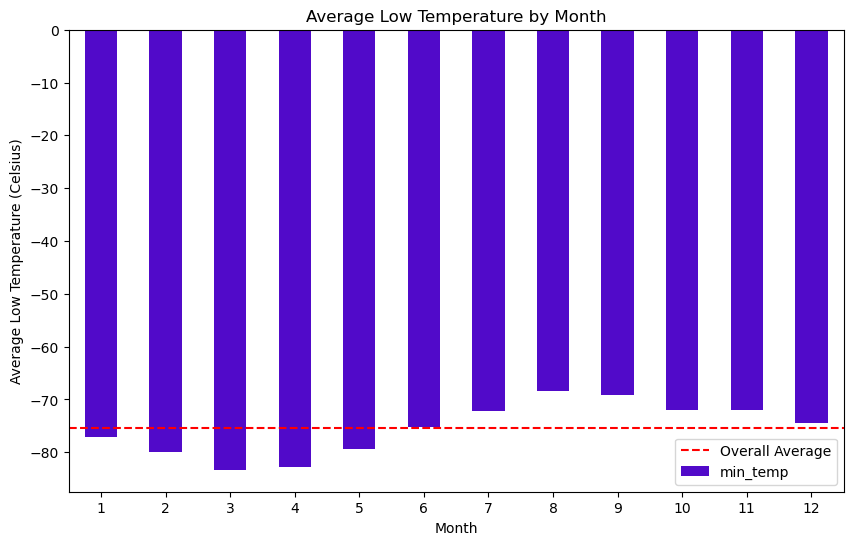

Coldest Month: 3
Warmest Month: 8
Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [63]:
# 3. What is the average low temperature by month?
# Group by 'month' and calculate average low temperature
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = average_min_temp_by_month.idxmin()
warmest_month = average_min_temp_by_month.idxmax()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar', color='#510AC9')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.axhline(y=average_min_temp_by_month.mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

print(f"Coldest Month: {coldest_month}")
print(f"Warmest Month: {warmest_month}")
print("Average low temperature by month:")
print(average_min_temp_by_month)

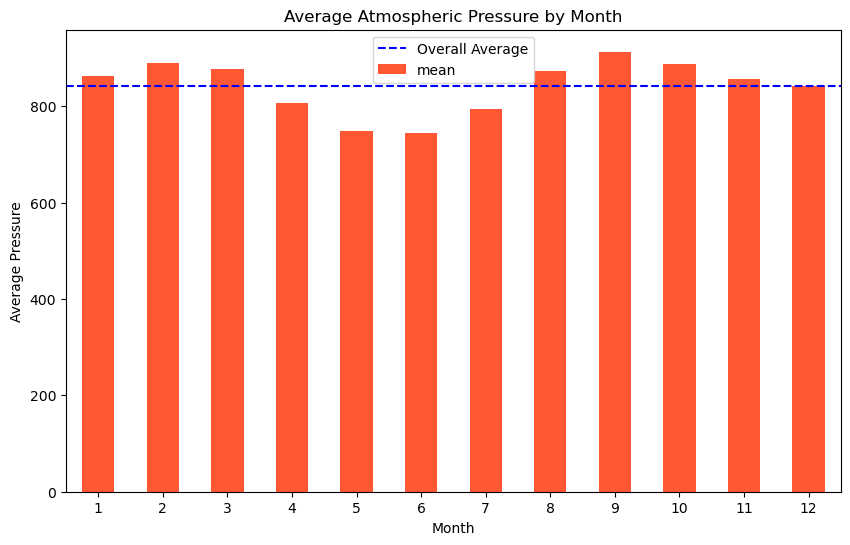

Pressure statistics by Martian month:
             mean    max    min
month                          
1      862.488506  888.0  820.0
2      889.455056  908.0  867.0
3      877.322917  907.0  833.0
4      806.329897  857.0  754.0
5      748.557047  777.0  727.0
6      745.054422  764.0  732.0
7      795.105634  836.0  751.0
8      873.829787  914.0  828.0
9      913.305970  925.0  896.0
10     887.312500  917.0  862.0
11     857.014493  879.0  837.0
12     842.156627  853.0  829.0
Month with Lowest Pressure: 6 - Pressure: 745.0544217687075
Month with Highest Pressure: 9 - Pressure: 913.3059701492538


In [75]:
# 4.Calculate the average daily atmospheric pressure for each month
pressure_stats_by_month = df.groupby('month')['pressure'].agg(['mean', 'max', 'min'])

# Find the months with the lowest and highest atmospheric pressure
lowest_pressure_month = pressure_stats_by_month['mean'].idxmin()
lowest_pressure_value = pressure_stats_by_month.loc[lowest_pressure_month, 'mean']

highest_pressure_month = pressure_stats_by_month['mean'].idxmax()
highest_pressure_value = pressure_stats_by_month.loc[highest_pressure_month, 'mean']

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
pressure_stats_by_month['mean'].plot(kind='bar', color='#FF5733')
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.axhline(y=pressure_stats_by_month['mean'].mean(), color='blue', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

print("Pressure statistics by Martian month:")
print(pressure_stats_by_month)

print(f"Month with Lowest Pressure: {lowest_pressure_month} - Pressure: {lowest_pressure_value}")
print(f"Month with Highest Pressure: {highest_pressure_month} - Pressure: {highest_pressure_value}")


In [76]:
# 5. How many terrestrial (earth) days are there in a Martian year? *Xpert Help

# Calculate the range of terrestrial dates
earliest_date = pd.to_datetime(df['terrestrial_date']).min()
latest_date = pd.to_datetime(df['terrestrial_date']).max()

# Calculate the number of terrestrial days
terrestrial_days = (latest_date - earliest_date).days + 1  # Adding 1 to include both start and end dates

# Print the result
print(f"There are {terrestrial_days} terrestrial (Earth) days in the Martian year covered by the dataset.")

There are 2022 terrestrial (Earth) days in the Martian year covered by the dataset.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [80]:
# Given information
mars_year_in_earth_days = 687
distance_peak_to_peak = 675

# Calculate the number of terrestrial days in a Martian year based on the distance from peak to peak
terrestrial_days_in_martian_year = distance_peak_to_peak * (mars_year_in_earth_days / distance_peak_to_peak)

print(f"The estimated number of terrestrial days in a Martian year is approximately: {terrestrial_days_in_martian_year} days.")


The estimated number of terrestrial days in a Martian year is approximately: 686.9999999999999 days.


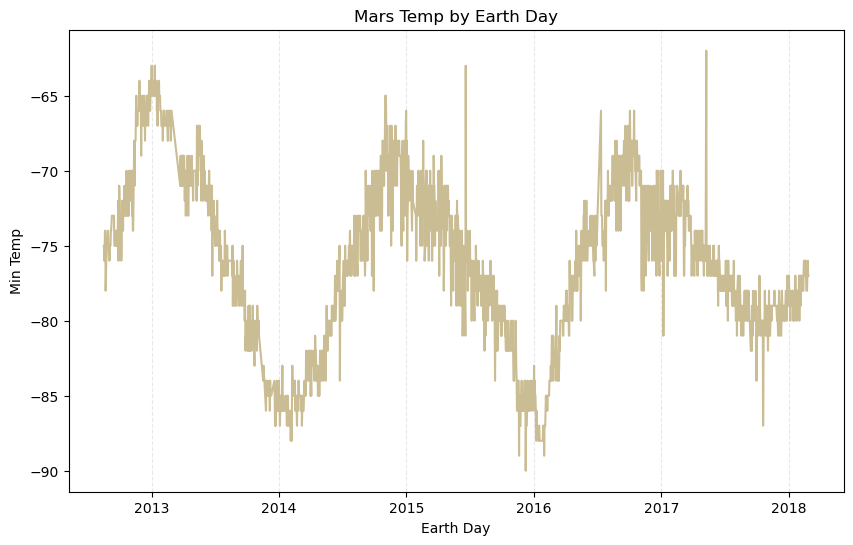

In [85]:
# Plot the Martian temperature data against Earth days
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color="#CBBD93")
plt.xlabel("Earth Day")
plt.ylabel("Min Temp")
plt.title("Mars Temp by Earth Day")
plt.grid(axis="x", color="lightgrey", alpha=0.5, linestyle="--")
plt.show()

In [20]:
# Step 1: Identify the duration of a Martian day (sol) Use Xpert for this portion 
martian_day_duration_hours = 24.6  # Assuming a Martian day is approximately 24.6 hours

# Step 2: Calculate the total number of Martian days in a Martian year
# Assuming a Martian year is 1.88 Earth years
martian_year_in_earth_years = 1.88
total_martian_days_in_year = martian_year_in_earth_years * 687  # 687 Martian days in a Martian year

# Step 3: Convert the total Martian days to terrestrial (earth) days
total_earth_days_in_martian_year = total_martian_days_in_year * (martian_day_duration_hours / 24)

print("Total terrestrial (earth) days in a Martian year:", total_earth_days_in_martian_year)

Total terrestrial (earth) days in a Martian year: 1323.8490000000002


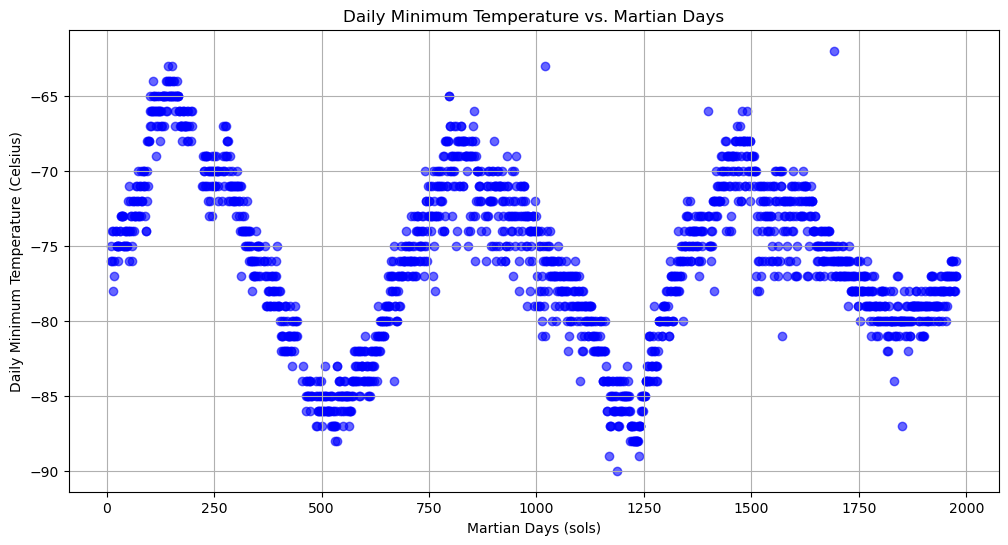

Total terrestrial (earth) days in a Martian year: 686.67


In [21]:
# Calculate the total number of Earth days in a Martian year Use Xpert for this portion
# Assuming a Martian year is 1.88 Earth years
martian_year_in_earth_years = 1.88
total_earth_days_in_martian_year = martian_year_in_earth_years * 365.25

# Create a scatter plot of daily minimum temperatures against Martian days
plt.figure(figsize=(12, 6))
plt.scatter(df['sol'], df['min_temp'], color='blue', alpha=0.6)
plt.title('Daily Minimum Temperature vs. Martian Days')
plt.xlabel('Martian Days (sols)')
plt.ylabel('Daily Minimum Temperature (Celsius)')
plt.grid(True)
plt.show()

print("Total terrestrial (earth) days in a Martian year:", total_earth_days_in_martian_year)

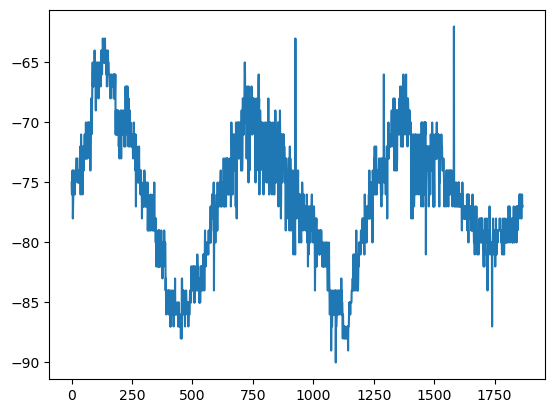

In [88]:
#In class simpler code
df.min_temp.plot()
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV - USE XPERT for better understanding
df.to_csv("mars_data.csv", index=False)

#Setting index=False in the to_csv method call ensures that the DataFrame index is not included in the exported CSV file. If you want to exclude the index column from the CSV file, you should set index=False.
#If you want to include the index column in the exported CSV file, you can omit index=False from the to_csv method call.
#df: Represents the DataFrame containing the Mars data.
#to_csv("mars_data.csv"): Saves the DataFrame to a CSV file named "mars_data.csv" in the current directory.          
#index=True, the row numbers will be included in the CSV file as a separate column. Maintaining the original order of the rows when exporting the data

In [24]:
browser.quit()